# Rf 3 0 7_Fullpereventerrors
Multidimensional models: usage of full p.d.f. with per-event errors




**Author:** Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:48 AM.</small></i>

In [1]:
import ROOT

Welcome to JupyROOT 6.18/03


B-physics pdf with per-event Gaussian resolution
----------------------------------------------------------------------------------------------

Observables

In [2]:
dt = ROOT.RooRealVar("dt", "dt", -10, 10)
dterr = ROOT.RooRealVar("dterr", "per-event error on dt", 0.01, 10)


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Build a gaussian resolution model scaled by the per-error =
gauss(dt,bias,sigma*dterr)

In [3]:
bias = ROOT.RooRealVar("bias", "bias", 0, -10, 10)
sigma = ROOT.RooRealVar(
    "sigma", "per-event error scale factor", 1, 0.1, 10)
gm = ROOT.RooGaussModel(
    "gm1", "gauss model scaled bt per-event error", dt, bias, sigma, dterr)

Construct decay(dt) (x) gauss1(dt|dterr)

In [4]:
tau = ROOT.RooRealVar("tau", "tau", 1.548)
decay_gm = ROOT.RooDecay("decay_gm", "decay", dt,
                         tau, gm, ROOT.RooDecay.DoubleSided)

Construct empirical pdf for per-event error
-----------------------------------------------------------------

Use landau p.d.f to get empirical distribution with long tail

In [5]:
pdfDtErr = ROOT.RooLandau("pdfDtErr", "pdfDtErr", dterr, ROOT.RooFit.RooConst(
    1), ROOT.RooFit.RooConst(0.25))
expDataDterr = pdfDtErr.generate(ROOT.RooArgSet(dterr), 10000)

Construct a histogram pdf to describe the shape of the dtErr distribution

In [6]:
expHistDterr = expDataDterr.binnedClone()
pdfErr = ROOT.RooHistPdf(
    "pdfErr", "pdfErr", ROOT.RooArgSet(dterr), expHistDterr)

Construct conditional product decay_dm(dt|dterr)*pdf(dterr)
----------------------------------------------------------------------------------------------------------------------

Construct production of conditional decay_dm(dt|dterr) with empirical
pdfErr(dterr)

In [7]:
model = ROOT.RooProdPdf(
    "model",
    "model",
    ROOT.RooArgSet(pdfErr),
    ROOT.RooFit.Conditional(
        ROOT.RooArgSet(decay_gm),
        ROOT.RooArgSet(dt)))

(Alternatively you could also use the landau shape pdfDtErr)
ROOT.RooProdPdf model("model", "model",pdfDtErr,
ROOT.RooFit.Conditional(decay_gm,dt))

Sample, fit and plot product model
------------------------------------------------------------------

Specify external dataset with dterr values to use model_dm as
conditional p.d.f.

In [8]:
data = model.generate(ROOT.RooArgSet(dt, dterr), 10000)

Fit conditional decay_dm(dt|dterr)
---------------------------------------------------------------------

Specify dterr as conditional observable

In [9]:
model.fitTo(data)

<ROOT.RooFitResult object at 0x(nil)>

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions have been identified as constant and will be precalculated and cached: (pdfErr)
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (decay_gm)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 bias         0.00000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
     2 sigma        1.00000e+00  4.50000e-01    1.00000e-01  1.00000e+01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH 

Plot conditional decay_dm(dt|dterr)
---------------------------------------------------------------------

Make two-dimensional plot of conditional p.d.f in (dt,dterr)

In [10]:
hh_model = model.createHistogram("hh_model", dt, ROOT.RooFit.Binning(
    50), ROOT.RooFit.YVar(dterr, ROOT.RooFit.Binning(50)))
hh_model.SetLineColor(ROOT.kBlue)

Make projection of data an dt

In [11]:
frame = dt.frame(ROOT.RooFit.Title("Projection of model(dt|dterr) on dt"))
data.plotOn(frame)
model.plotOn(frame)

<ROOT.RooPlot object ("frame_dt_55ce73b14630") at 0x55ce73b14630>

[#1] INFO:Plotting -- RooAbsReal::plotOn(model) plot on dt integrates over variables (dterr)
[#1] INFO:NumericIntegration -- RooRealIntegral::init([pdfErr_NORM[dterr]_X_decay_gm_NORM[dt]]_Int[dterr]) using numeric integrator RooIntegrator1D to calculate Int(dterr)


Draw all frames on canvas

In [12]:
c = ROOT.TCanvas("rf307_fullpereventerrors",
                 "rf307_fullpereventerrors", 800, 400)
c.Divide(2)
c.cd(1)
ROOT.gPad.SetLeftMargin(0.20)
hh_model.GetZaxis().SetTitleOffset(2.5)
hh_model.Draw("surf")
c.cd(2)
ROOT.gPad.SetLeftMargin(0.15)
frame.GetYaxis().SetTitleOffset(1.6)
frame.Draw()

c.SaveAs("rf307_fullpereventerrors.png")

Info in <TCanvas::Print>: png file rf307_fullpereventerrors.png has been created


Draw all canvases 

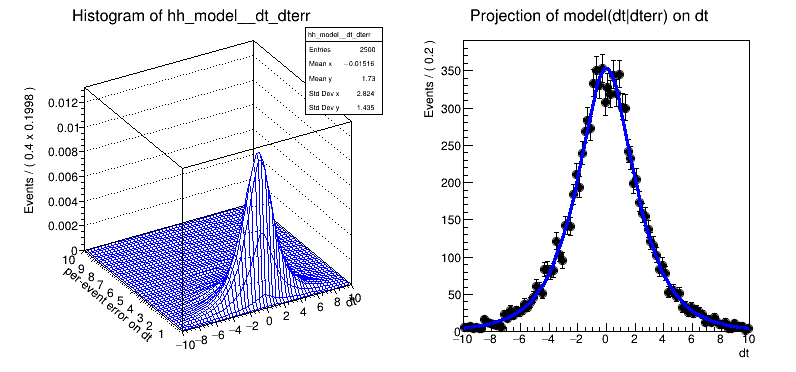

In [13]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()